In [1]:
import pandas as pd
import keras
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading The dataset 
df = pd.read_csv('forestfires.csv')

In [3]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
df.shape

(517, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df = df.drop('month',axis=1)
df = df.drop('day',axis=1)

In [8]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [9]:
df[df.duplicated()]

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small
100,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small
215,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66,0,...,0,0,0,0,1,0,0,0,0,large
303,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00,1,...,0,0,0,1,0,0,0,0,0,small
426,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small
461,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small
501,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,0,...,0,0,0,0,0,0,0,0,0,small
508,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00,1,...,0,0,0,0,0,0,0,0,0,small


In [10]:
df = df.drop_duplicates()
df.reset_index(drop=True,inplace=True)
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [11]:
df.shape

(509, 29)

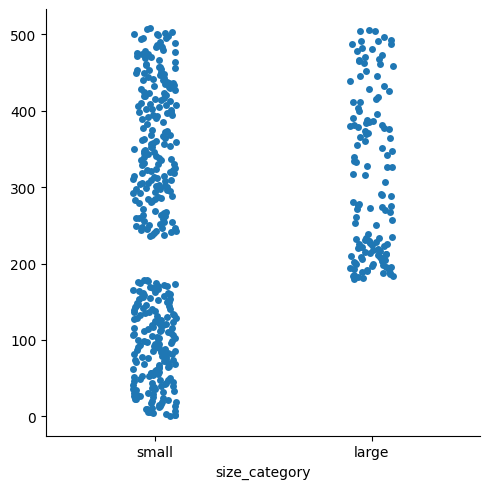

In [12]:
import seaborn as sns 
sns.catplot(x=df.size_category,y = df['size_category'].index)

In [13]:
df['size_category'].value_counts()

small    371
large    138
Name: size_category, dtype: int64

<Axes: >

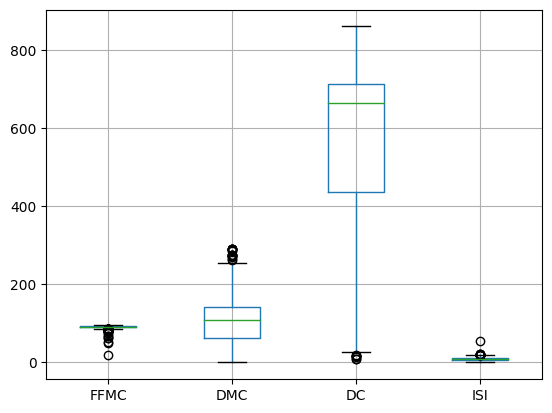

In [14]:

df.iloc[:,0:4].boxplot()

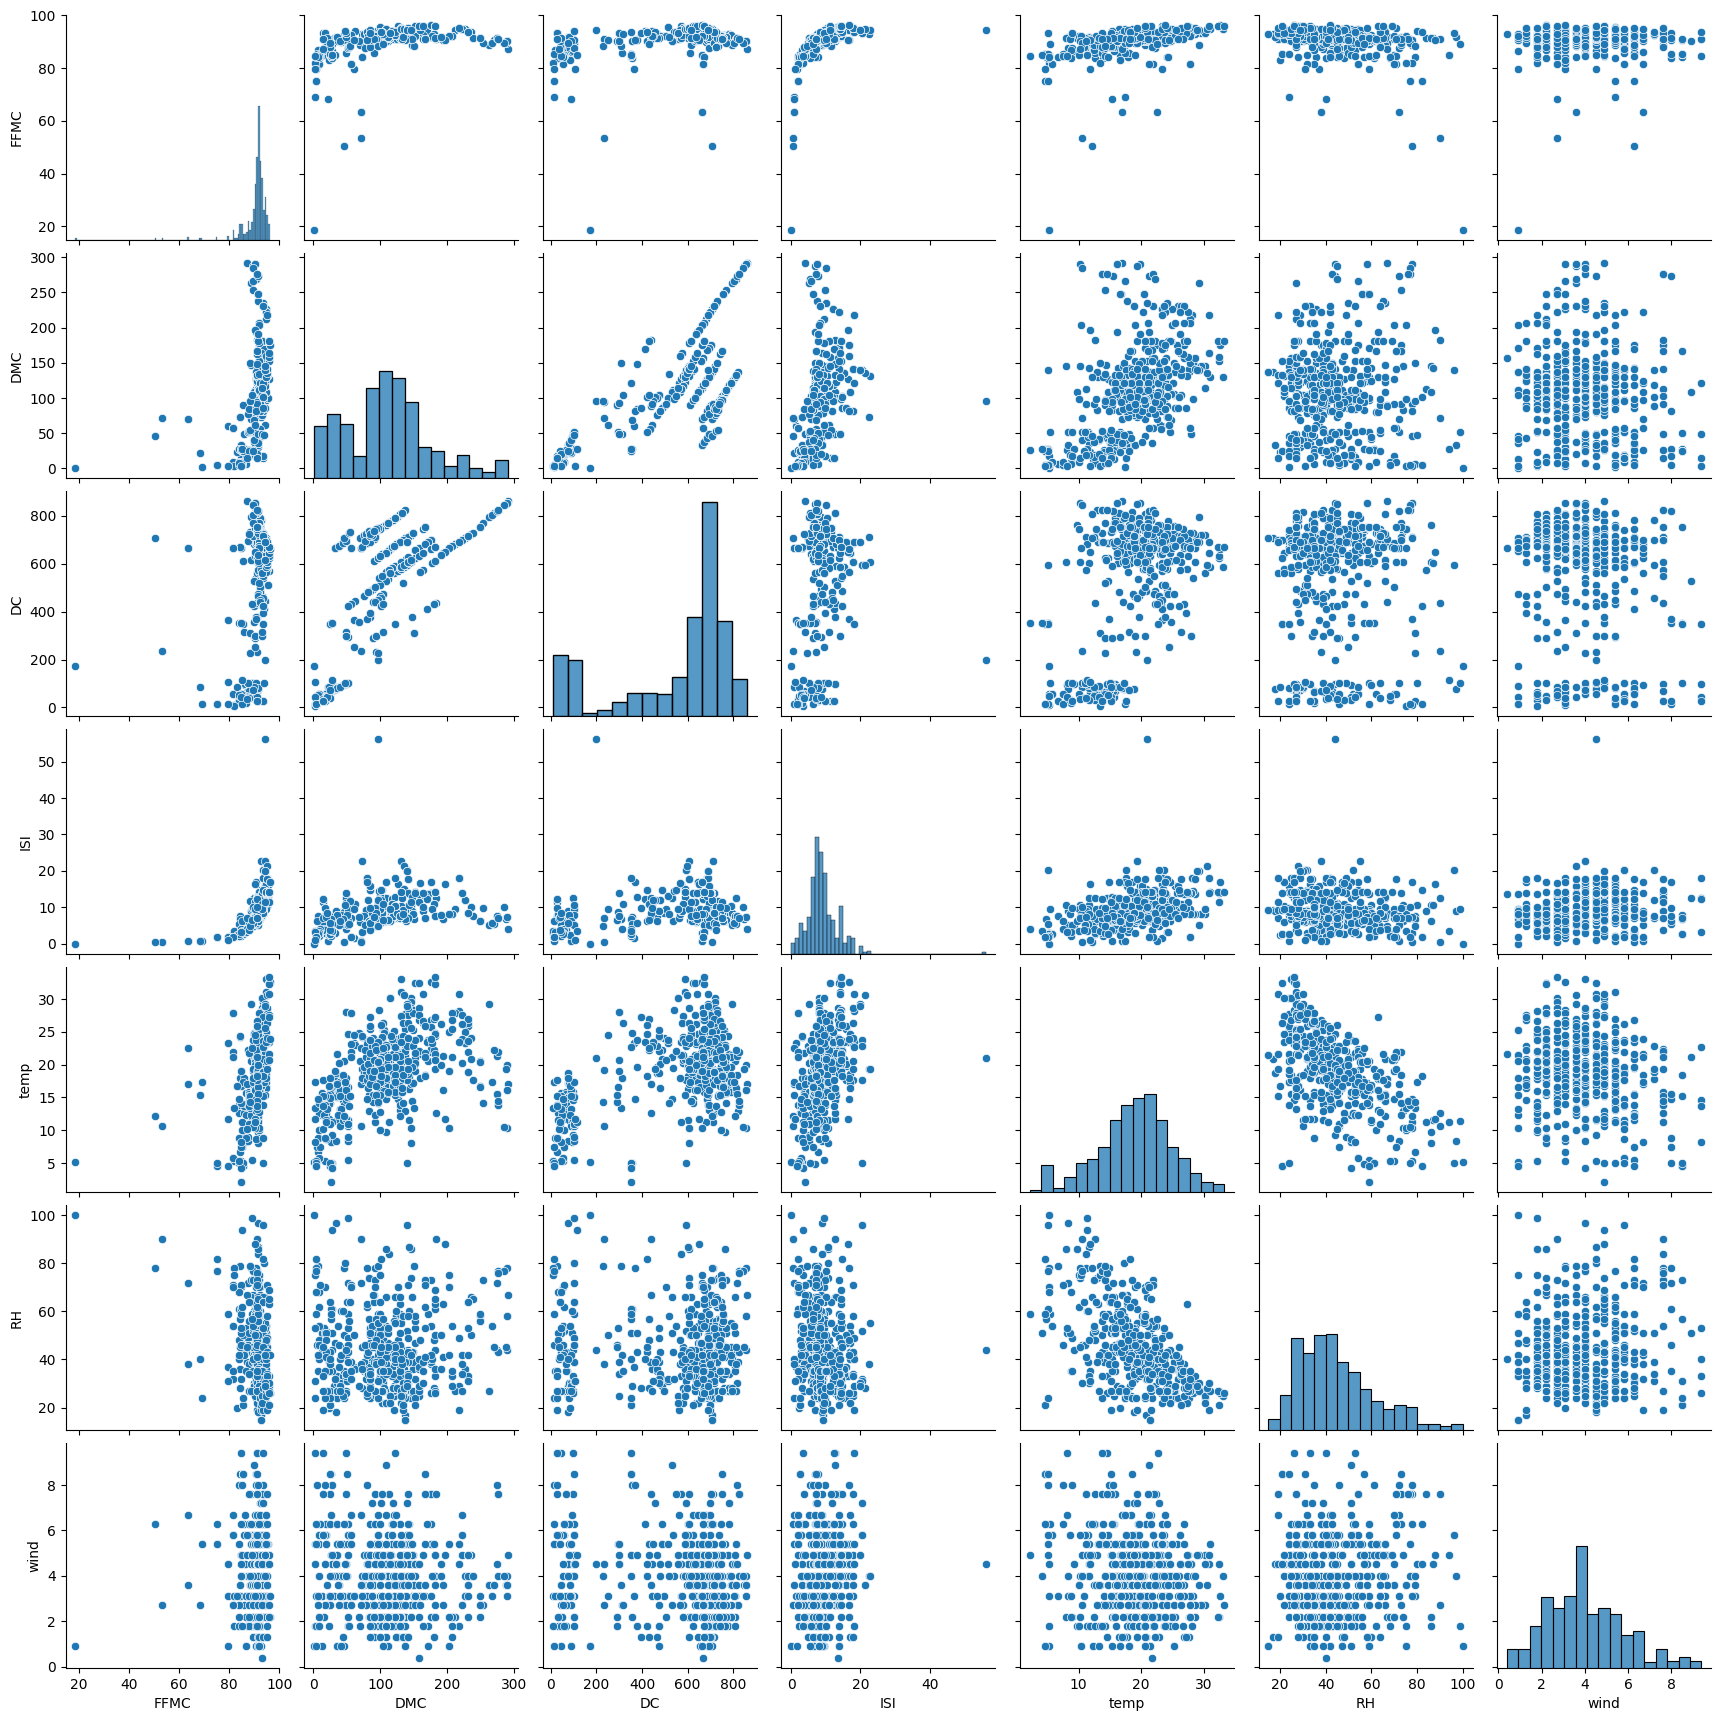

In [15]:
sns.pairplot(df.iloc[:,0:7])

In [16]:

# Label encoding For 'size_category'
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['size_category']= label.fit_transform(df['size_category'])
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [17]:
df.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

In [18]:
# Spliting The Dataset 
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [19]:
# Normalizing The data 
a= StandardScaler()
a.fit(x)
X = a.transform(x)


In [20]:
X

array([[-7.96039810e-01, -1.31838569e+00, -1.82893094e+00, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [-3.25665522e-03, -1.17405250e+00,  4.89256926e-01, ...,
        -4.43678255e-02,  5.73875712e+00, -7.14412875e-01],
       [-3.25665522e-03, -1.04383887e+00,  5.61044929e-01, ...,
        -4.43678255e-02,  5.73875712e+00, -7.14412875e-01],
       ...,
       [-1.62485856e+00, -8.39889805e-01,  4.75141308e-01, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [ 6.81419706e-01,  5.61083388e-01,  2.69859884e-01, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [-2.00323234e+00, -1.68235633e+00, -1.77892132e+00, ...,
         2.25388553e+01, -1.74253759e-01, -7.14412875e-01]])

In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
504    0
505    0
506    0
507    1
508    1
Name: size_category, Length: 509, dtype: int64

Model Building 1

In [22]:
# Defining  Model 
from keras.layers import Dense,Dropout
from sklearn.metrics import classification_report,accuracy_score
from keras.optimizers import Adam
def create_model() :  
    model = Sequential()
    model.add (Dense(16,input_dim =28,kernel_initializer='uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(4,activation='tanh')) 
    model.add(Dropout(0.1))
    model.add(Dense(1,activation='sigmoid')) 

   
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

    

In [23]:
# Create Model 
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=create_model,verbose=0,batch_size =40 ,epochs=10)

<ipython-input-23-dce306d0ec02>:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model,verbose=0,batch_size =40 ,epochs=10)


In [24]:
# Fitting the model 
model.fit(X,y)

In [25]:
# Predicting using Trained Model 
y_predict = model.predict(X)

16/16 [==============================] - 0s 1ms/step


In [26]:
#Predicting the metrics 
print(accuracy_score(y,y_predict))

0.7779960707269156


Model Building 2

In [27]:
# Defining Model 
def create_model_2() : 
    model = Sequential()
    model.add(Dense(12,input_dim = 28,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(8,input_dim = 16,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model
  

In [28]:
# Create model 
model1= KerasClassifier(build_fn=create_model_2,verbose=0,batch_size=40,epochs=10)

<ipython-input-28-d2d2de679d97>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model1= KerasClassifier(build_fn=create_model_2,verbose=0,batch_size=40,epochs=10)


In [29]:
# Fitting The Model 
model1.fit(X,y)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [30]:
# Predicting using trained model 
y_pred = model1.predict(X)

16/16 [==============================] - 0s 1ms/step


In [31]:
# Printing the Metrics 
print(accuracy_score(y,y_pred))

0.7288801571709234
